# Census Income Project

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

In [1]:
import numpy as np # use to help in array and matrix
import pandas as pd # use to load the dataset

# use to avoid unnecessary informations
import warnings
warnings.filterwarnings('ignore')

## loading dataset

In [2]:
pd.set_option("display.max_columns", None)
census=pd.read_csv('census_income.csv')
census.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


# Preprocessing

In [3]:
census.shape

(32560, 15)

we have 32560 rows and 15 columns

In [4]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


dataset have datatypes objects and int64 

In [5]:
census.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

no null values in dataset

In [6]:
census.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [7]:
census.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [8]:
census.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


1) we can see age have max vale 90 and min value 17

2) capital gain and capital loss have outliers, data is highly skewed

In [9]:
census.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

### no. of zeros

In [10]:
print("No. of Zeros in Age: ",sum(census['Age']==0))
print("No. of Zeros in Fnlwgt: ",sum(census['Fnlwgt']==0))
print("No. of Zeros in Education_num: ",sum(census['Education_num']==0))
print("No. of Zeros in Capital_gain: ",sum(census['Capital_gain']==0))
print("No. of Zeros in Capital_loss: ",sum(census['Capital_loss']==0))
print("No. of Zeros in Hours_per_week: ",sum(census['Hours_per_week']==0))

No. of Zeros in Age:  0
No. of Zeros in Fnlwgt:  0
No. of Zeros in Education_num:  0
No. of Zeros in Capital_gain:  29849
No. of Zeros in Capital_loss:  31041
No. of Zeros in Hours_per_week:  0


capital gain and capital loss have to much zeros

In [11]:
# check for categorical attributes
cat_col=[]
num_col=[]
for i in census.dtypes.index:
    if census.dtypes[i]=='object':
        cat_col.append(i)
    else:
        num_col.append(i)
print('Categorical Columns:\n\t\t',cat_col)
print('\n\nNumeric Columns:\n\t\t',num_col)

Categorical Columns:
		 ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


Numeric Columns:
		 ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']


separating categorical and numerical columns 

# EDA

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objs as go

In [13]:
census.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

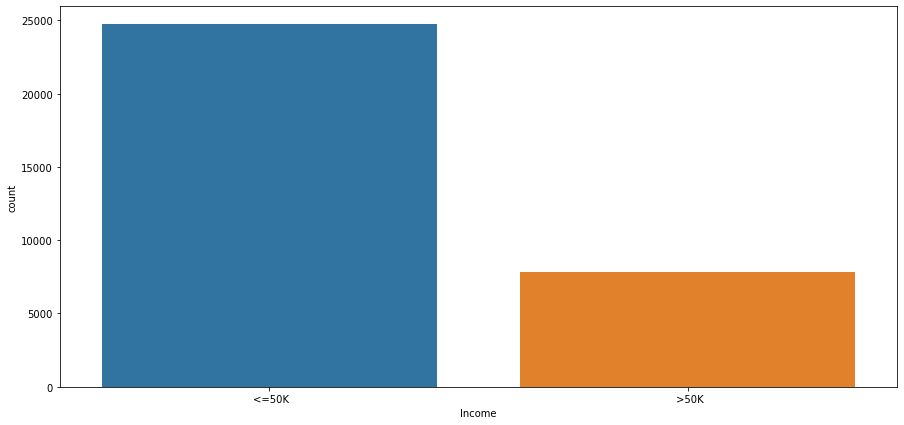

In [14]:
plt.figure(figsize=(15,7))
sns.countplot(x='Income',data=census)
census['Income'].value_counts()

income column has imbalanced class

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

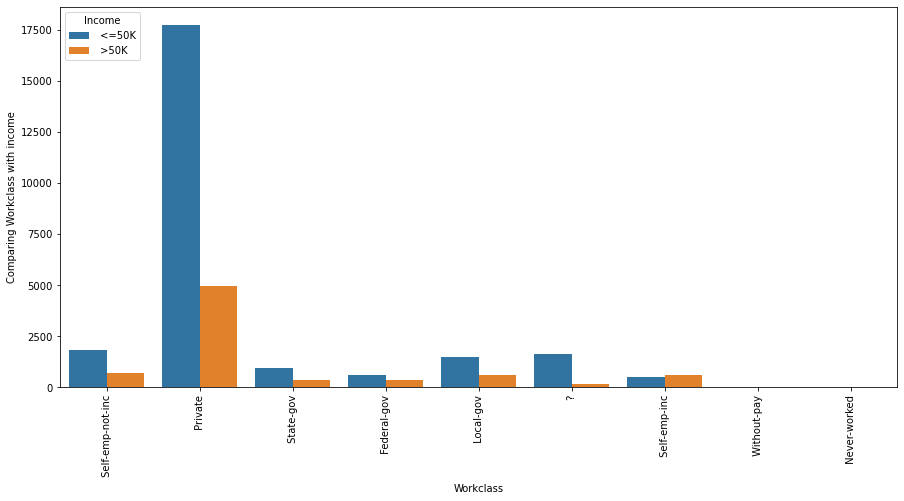

In [15]:
plt.figure(figsize=(15,7))
sns.countplot(x='Workclass',hue='Income',data=census)
plt.ylabel('Comparing Workclass with income')
plt.xticks(rotation=90)
census['Workclass'].value_counts()

1) private workclass has highest income less than 50k and more than 50k.
2) without pay and never worked have no income

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

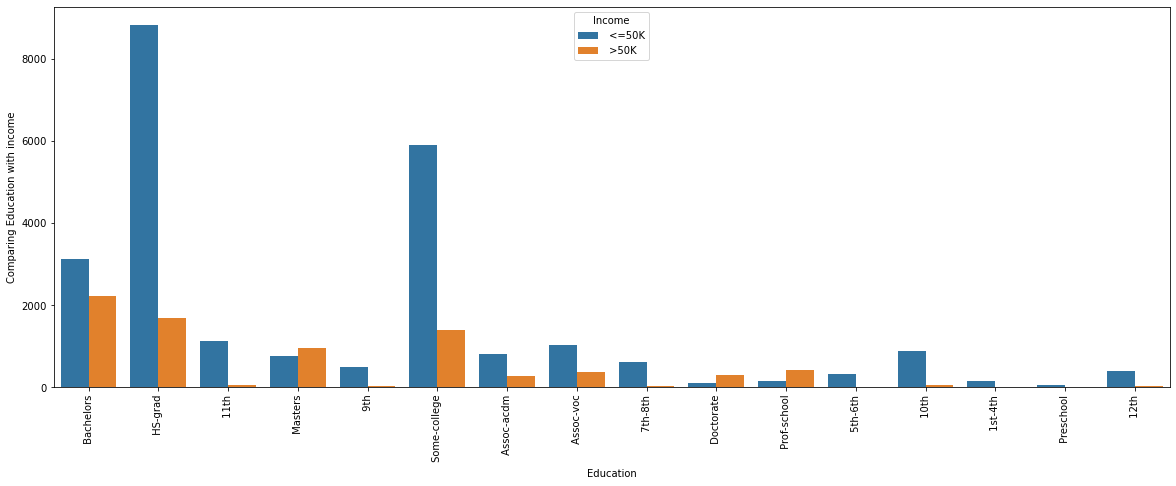

In [16]:
plt.figure(figsize=(20,7))
sns.countplot(x='Education',hue='Income',data=census)
plt.ylabel('Comparing Education with income')
plt.xticks(rotation=90)
census['Education'].value_counts()

Most of the people are high school graduate. There are few who have done masters and doctorate. The no. of people who went through just the preschool or 1st to 4th is the least.

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

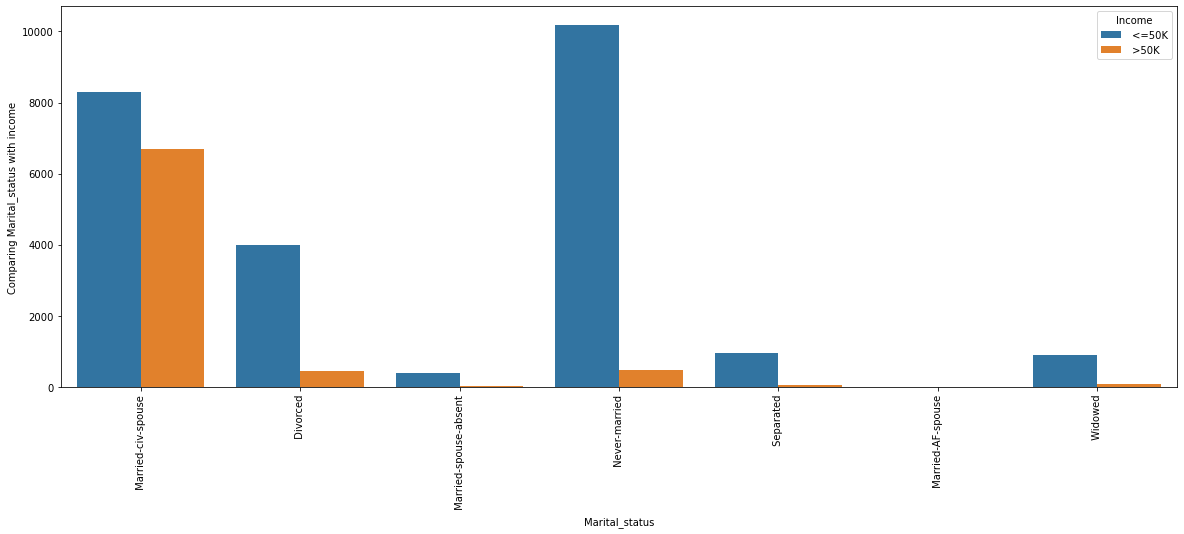

In [17]:
plt.figure(figsize=(20,7))
sns.countplot(x='Marital_status',hue='Income',data=census)
plt.ylabel('Comparing Marital_status with income')
plt.xticks(rotation=90)
census['Marital_status'].value_counts()

From the above maritial status data we can see that there are less young people in the workforce as compared to young ones.


 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

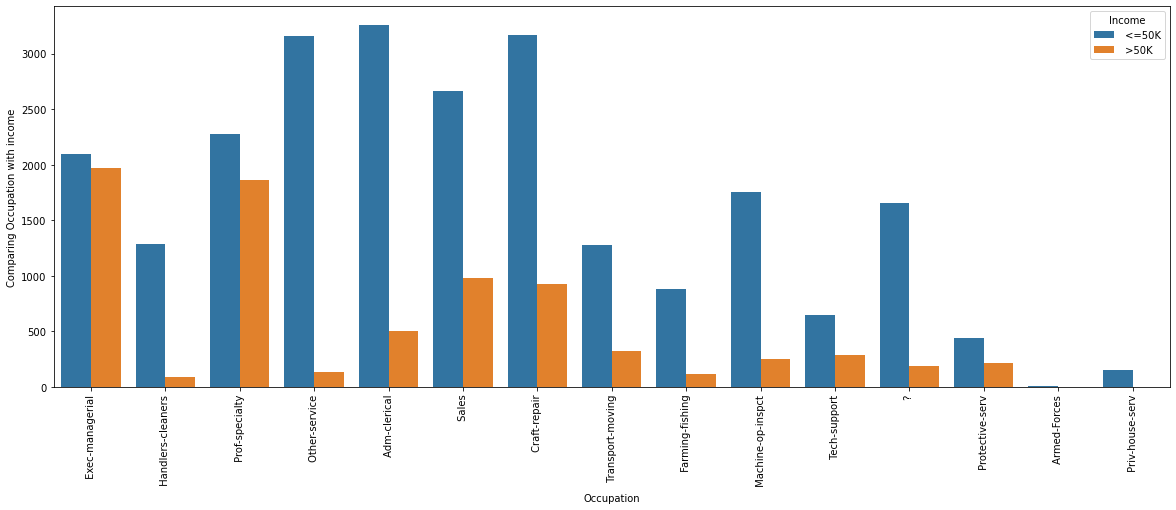

In [18]:
plt.figure(figsize=(20,7))
sns.countplot(x='Occupation',hue='Income',data=census)
plt.ylabel('Comparing Occupation with income')
plt.xticks(rotation=90)
census['Occupation'].value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

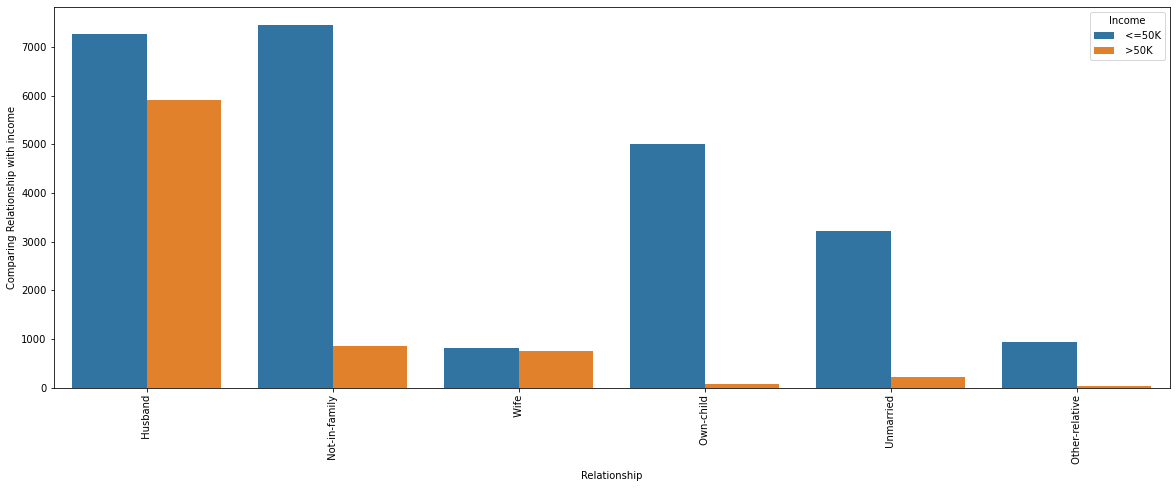

In [19]:
plt.figure(figsize=(20,7))
sns.countplot(x='Relationship',hue='Income',data=census)
plt.ylabel('Comparing Relationship with income')
plt.xticks(rotation=90)
census['Relationship'].value_counts()

There are much more husband working than their wives.  working individuals who fall in not in family category

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

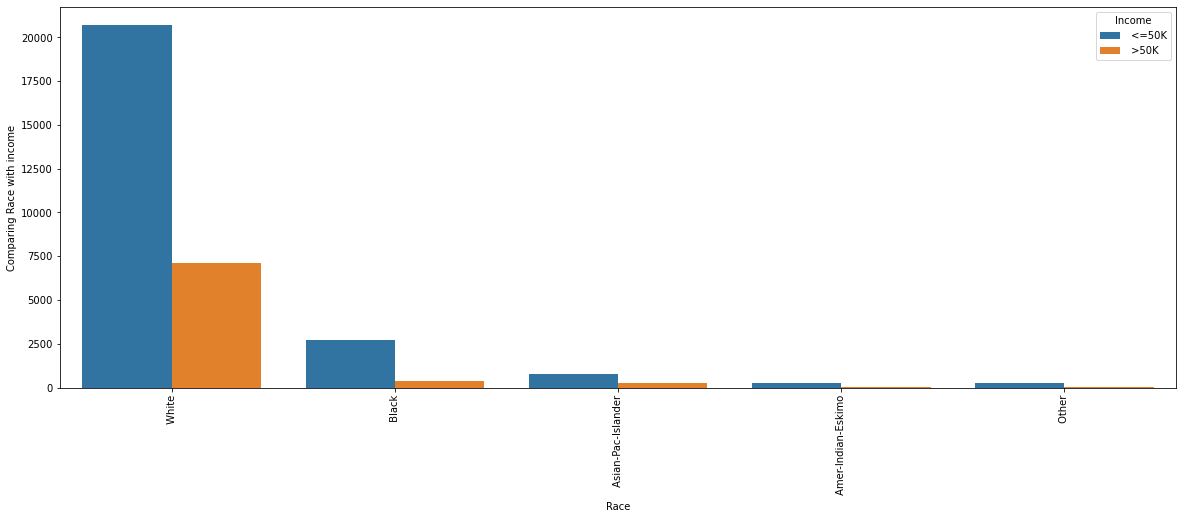

In [20]:
plt.figure(figsize=(20,7))
sns.countplot(x='Race',hue='Income',data=census)
plt.ylabel('Comparing Race with income')
plt.xticks(rotation=90)
census['Race'].value_counts()

most of the individuals working here are white. There is also an other category where minory races are present.

 Male      21789
 Female    10771
Name: Sex, dtype: int64

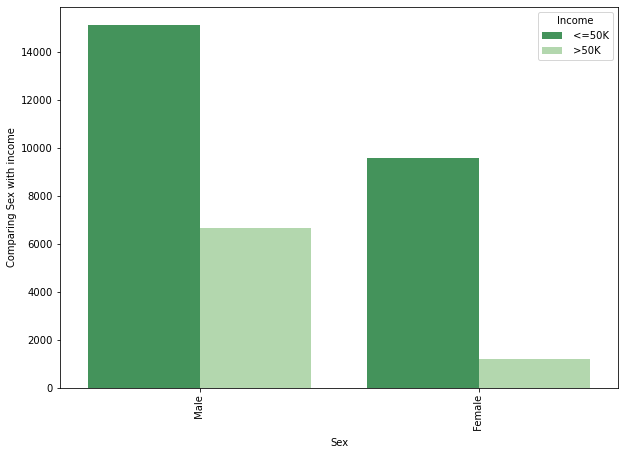

In [21]:
plt.figure(figsize=(10,7))
sns.countplot(x='Sex',hue='Income',data=census,palette='Greens_r')
plt.ylabel('Comparing Sex with income')
plt.xticks(rotation=90)
census['Sex'].value_counts()

male income is high compare to female

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

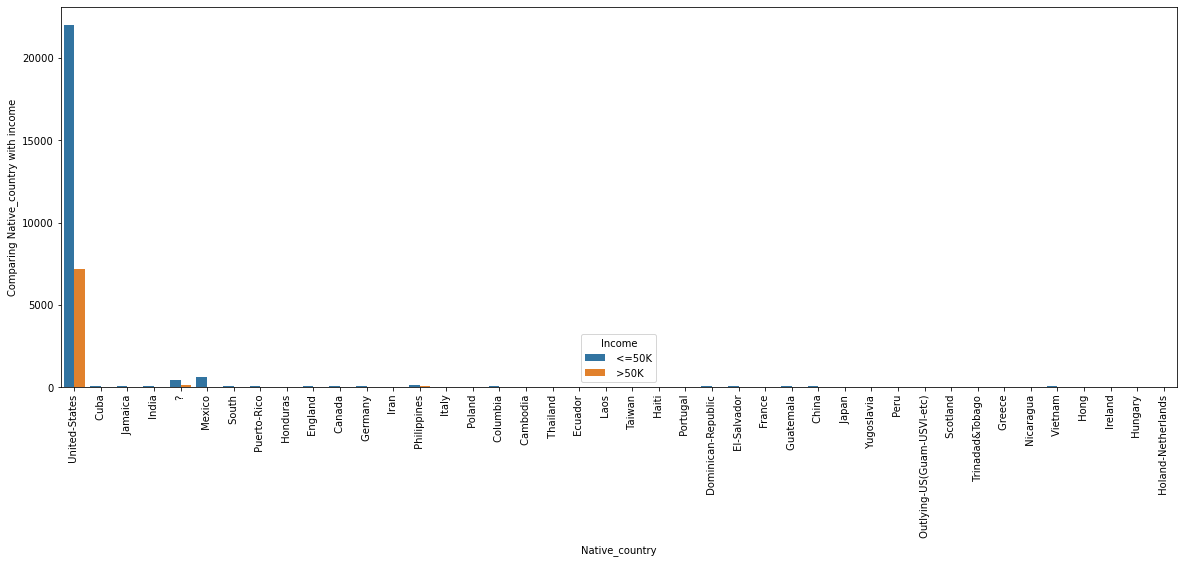

In [22]:
plt.figure(figsize=(20,7))
sns.countplot(x='Native_country',hue='Income',data=census)
plt.ylabel('Comparing Native_country with income')
plt.xticks(rotation=90)
census['Native_country'].value_counts()

Majority of the people working belong from U.S. whereas there are people who come to U.S. from their own countries but there no. is very low. 

minimun age: 17

maximun age: 90


36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
86      1
87      1
Name: Age, Length: 73, dtype: int64

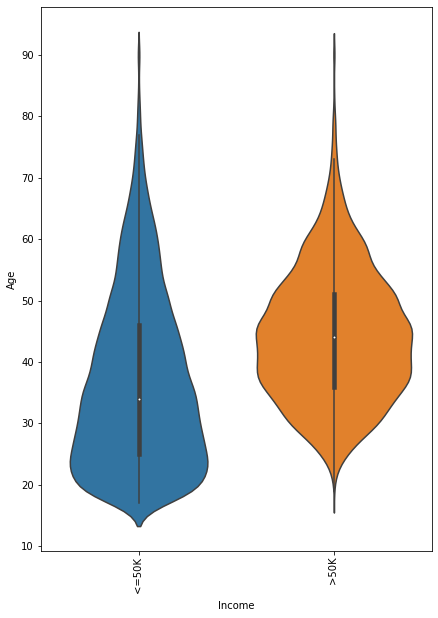

In [23]:
plt.figure(figsize=(7,10))
sns.violinplot(y='Age',x='Income',data=census)
plt.xticks(rotation=90)
print("minimun age:",census["Age"].min())
print("\nmaximun age:",census["Age"].max())
census['Age'].value_counts()

age between 30-60 have income more than 50k and age group between 20 to 40 have income less than 50k

(array([0, 1]), [Text(0, 0, ' <=50K'), Text(1, 0, ' >50K')])

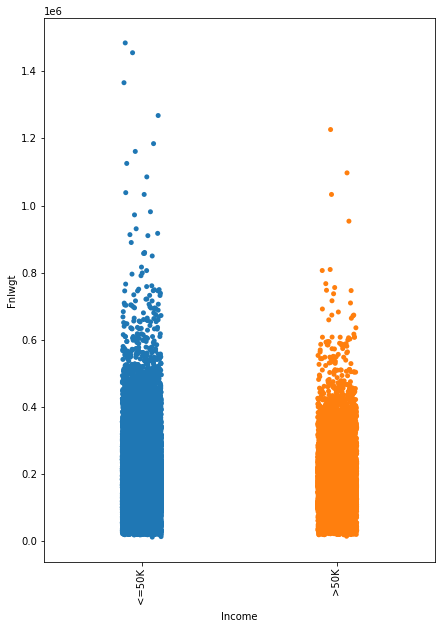

In [24]:
plt.figure(figsize=(7,10))
sns.stripplot(y='Fnlwgt',x='Income',data=census)
plt.xticks(rotation=90)

(array([0, 1]), [Text(0, 0, ' <=50K'), Text(1, 0, ' >50K')])

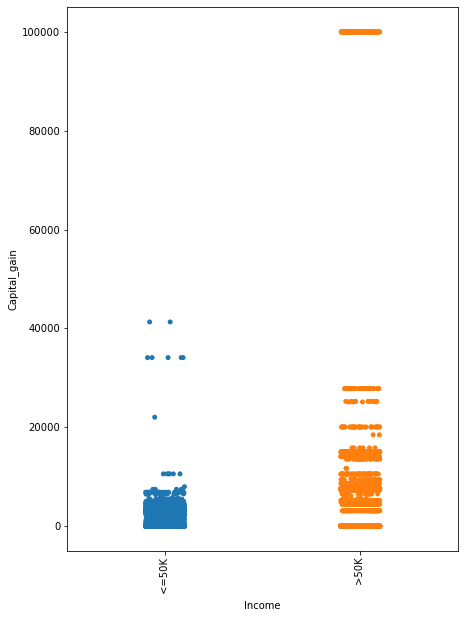

In [25]:
plt.figure(figsize=(7,10))
sns.stripplot(y='Capital_gain',x='Income',data=census)
plt.xticks(rotation=90)

capital gain has very less contribution to income

(array([0, 1]), [Text(0, 0, ' <=50K'), Text(1, 0, ' >50K')])

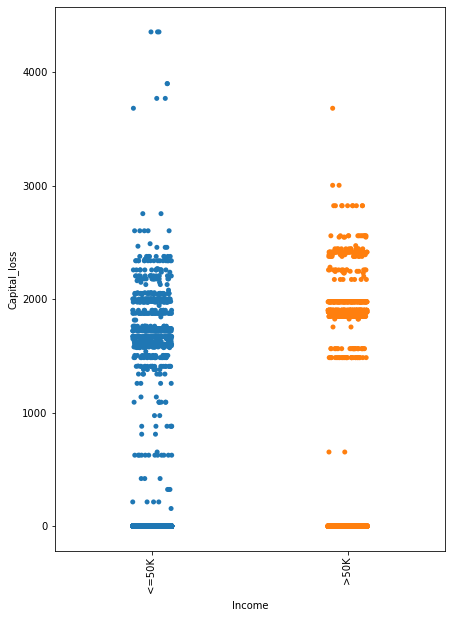

In [26]:
plt.figure(figsize=(7,10))
sns.stripplot(y='Capital_loss',x='Income',data=census)
plt.xticks(rotation=90)

capital loss has very less contribution to income

(array([0, 1]), [Text(0, 0, ' <=50K'), Text(1, 0, ' >50K')])

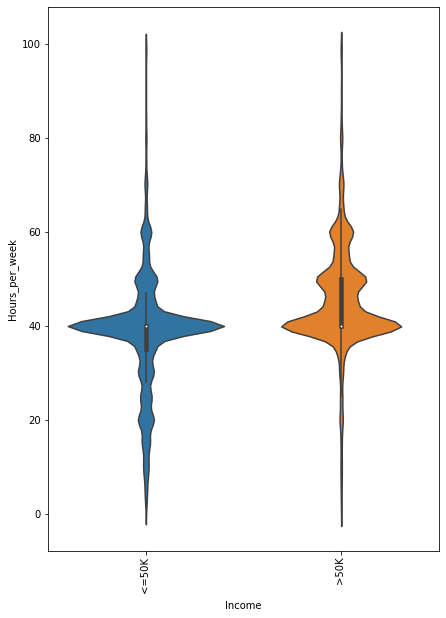

In [27]:
plt.figure(figsize=(7,10))
sns.violinplot(y='Hours_per_week',x='Income',data=census)
plt.xticks(rotation=90)

(array([0, 1]), [Text(0, 0, ' <=50K'), Text(1, 0, ' >50K')])

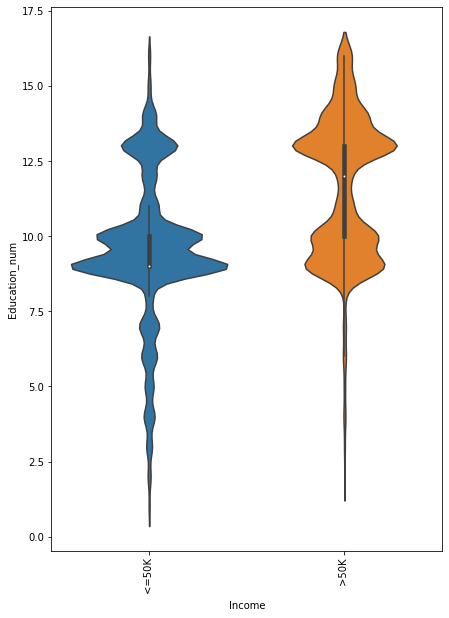

In [28]:
plt.figure(figsize=(7,10))
sns.violinplot(y='Education_num',x='Income',data=census)
plt.xticks(rotation=90)

### removing duplicates

In [29]:
duplicated = census.duplicated().sum()
total_lines = census.shape[0]
percentage = (duplicated/total_lines) * 100
print("Total of duplicates:",duplicated)
print("total rows:",total_lines)
print("percentage of duplicates:",percentage)
census=census.drop_duplicates(keep='first')
print("Shape after removing duplicates:",census.shape)

Total of duplicates: 24
total rows: 32560
percentage of duplicates: 0.07371007371007371
Shape after removing duplicates: (32536, 15)


dataset have 0.07 percentage duplicates. remove it

### heatmap correlation

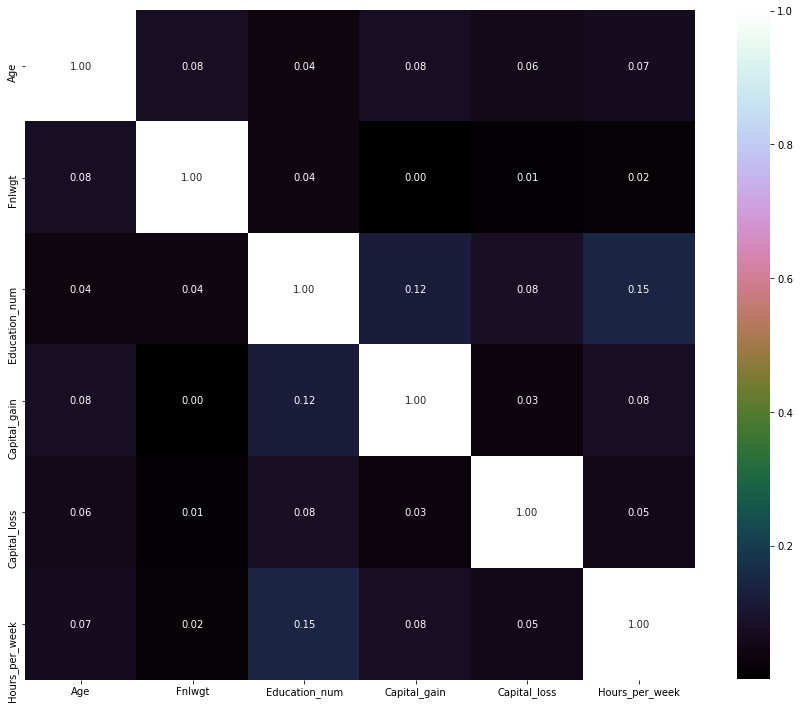

In [30]:
plt.figure(figsize=(15,15))
sns.heatmap(census.corr().abs(),square=True,fmt='.2f',cbar=True,cbar_kws={'shrink':.82},annot=True,annot_kws={'size':10},cmap='cubehelix')
plt.show()

showing captial gain and capital loss have very less correlation with income

### label encoding

In [31]:
census.drop('Native_country',axis=1,inplace=True)
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
le=LabelEncoder()

census['Income']=le.fit_transform(census['Income'])
census['Workclass']=le.fit_transform(census['Workclass'])
census['Education']=le.fit_transform(census['Education'])
census['Marital_status']=le.fit_transform(census['Marital_status'])
census['Occupation']=le.fit_transform(census['Occupation'])
census['Relationship']=le.fit_transform(census['Relationship'])
census['Race']=le.fit_transform(census['Race'])
census['Sex']=le.fit_transform(census['Sex'])


In [32]:
census

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,0
32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,1
32557,58,4,151910,11,9,6,1,4,4,0,0,0,40,0
32558,22,4,201490,11,9,4,1,3,4,1,0,0,20,0


### visualization of outliers and removing outliers

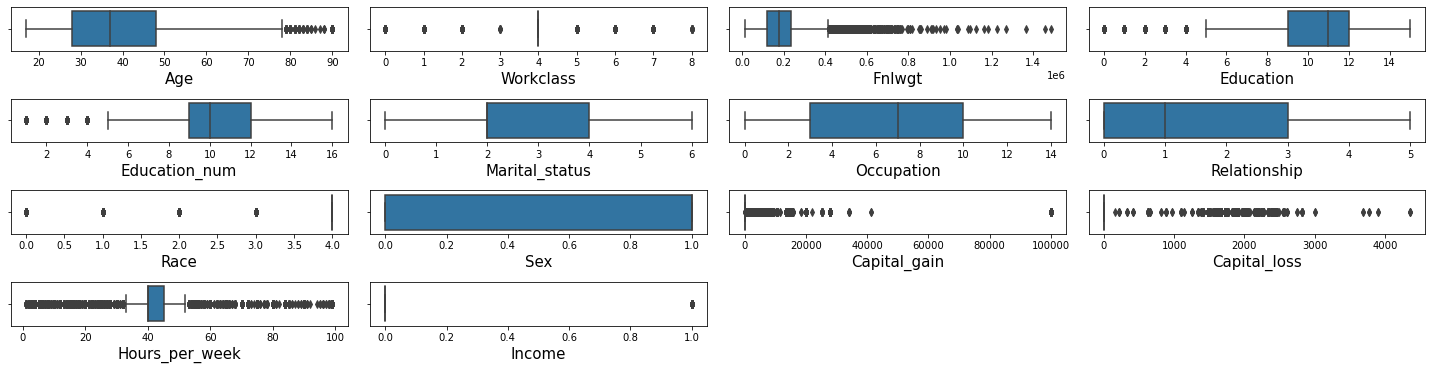

In [33]:
plt.figure(figsize=(20,6),facecolor='white')
plotnumber=1
for i in census:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.boxplot(census[i])
        plt.xlabel(i,fontsize=15)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [34]:
# importing zscore to remove outliers
from scipy.stats import zscore

def threshold():
    for i in np.arange(3,5,0.2):
        Census=census.copy()
        Census=Census[(z<i).all(axis=1)]
        loss=(census.shape[0]-Census.shape[0])/census.shape[0]*100
        print('With threshold {} data loss is {}%'.format(np.round(i,1),np.round(loss,2))) 

        
z=np.abs(zscore(census))
print(threshold())

With threshold 3.0 data loss is 12.19%
With threshold 3.2 data loss is 8.21%
With threshold 3.4 data loss is 7.51%
With threshold 3.6 data loss is 6.9%
With threshold 3.8 data loss is 6.06%
With threshold 4.0 data loss is 5.67%
With threshold 4.2 data loss is 5.15%
With threshold 4.4 data loss is 3.98%
With threshold 4.6 data loss is 2.66%
With threshold 4.8 data loss is 1.56%
None


at 4.8 threshold we are lossing 1.08% data. we can not loose more data

In [35]:
census=census[(z<4.2).all(axis=1)]

### visualization of skewness and removing skewness

In [36]:
census.skew()

Age               0.572142
Workclass        -0.756632
Fnlwgt            0.850753
Education        -0.927311
Education_num    -0.324829
Marital_status   -0.040133
Occupation        0.119769
Relationship      0.757860
Race             -2.359519
Sex              -0.690604
Capital_gain      5.495349
Capital_loss      7.767456
Hours_per_week   -0.086705
Income            1.330021
dtype: float64

features have high skewness

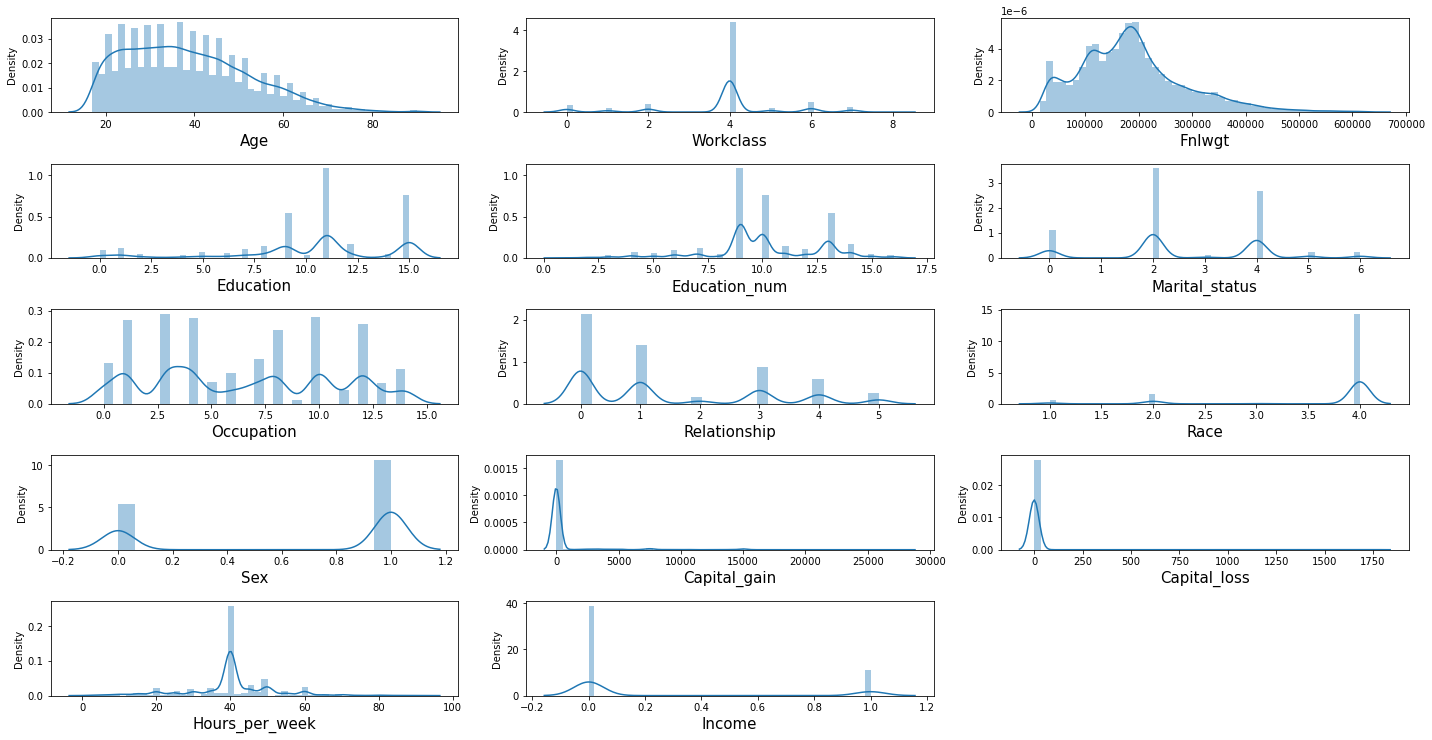

In [37]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for i in census:
    if plotnumber<=30:
        ax=plt.subplot(10,3,plotnumber)
        sns.distplot(census[i])
        plt.xlabel(i,fontsize=15)
    plotnumber+=1
plt.tight_layout()
plt.show()

###### power transformation to remove skewness

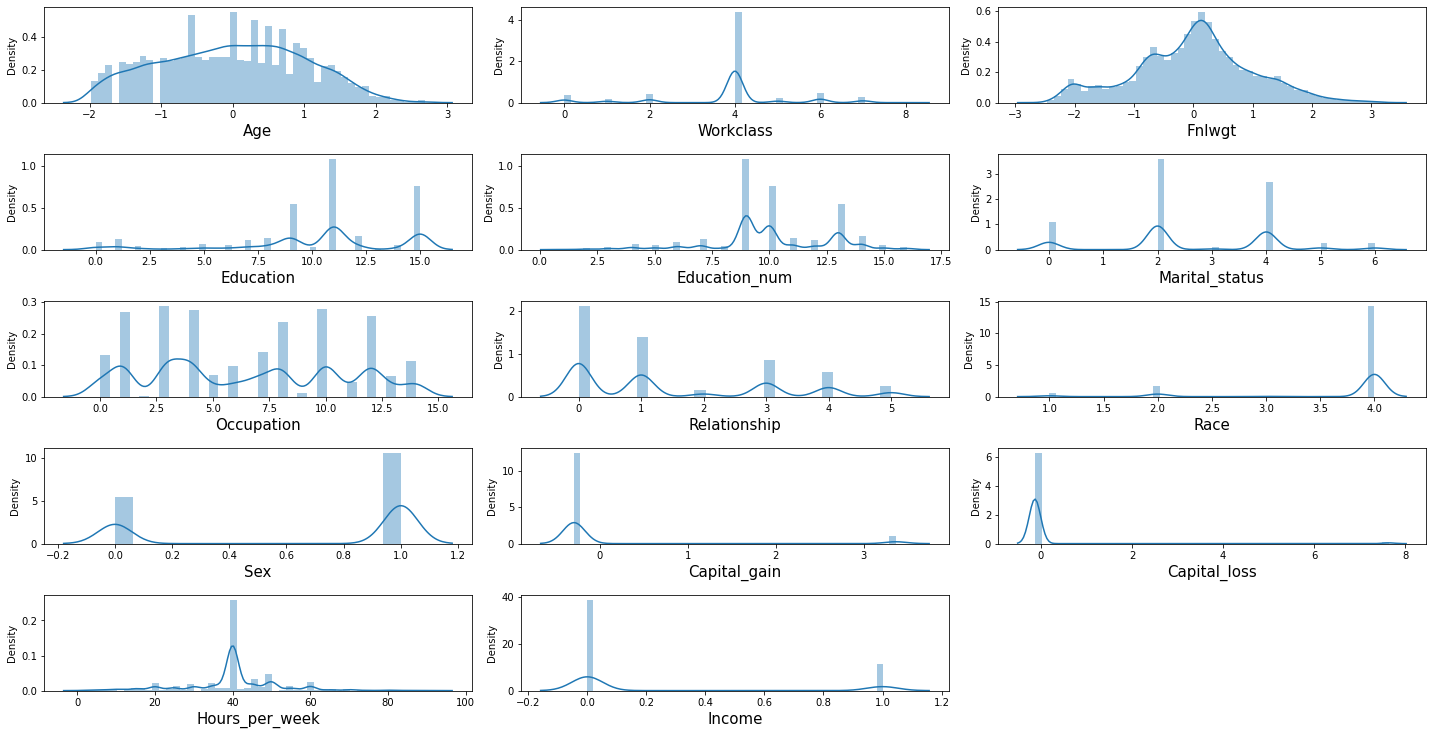

In [38]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()

for i in num_col:
    if np.abs(census[i].skew())>0.5:
        census[i]=pt.fit_transform(census[i].values.reshape(-1,1))

plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for i in census:
    if plotnumber<=30:
        ax=plt.subplot(10,3,plotnumber)
        sns.distplot(census[i])
        plt.xlabel(i,fontsize=15)
    plotnumber+=1
plt.tight_layout()
plt.show()

###### boxplot showing removed outliers

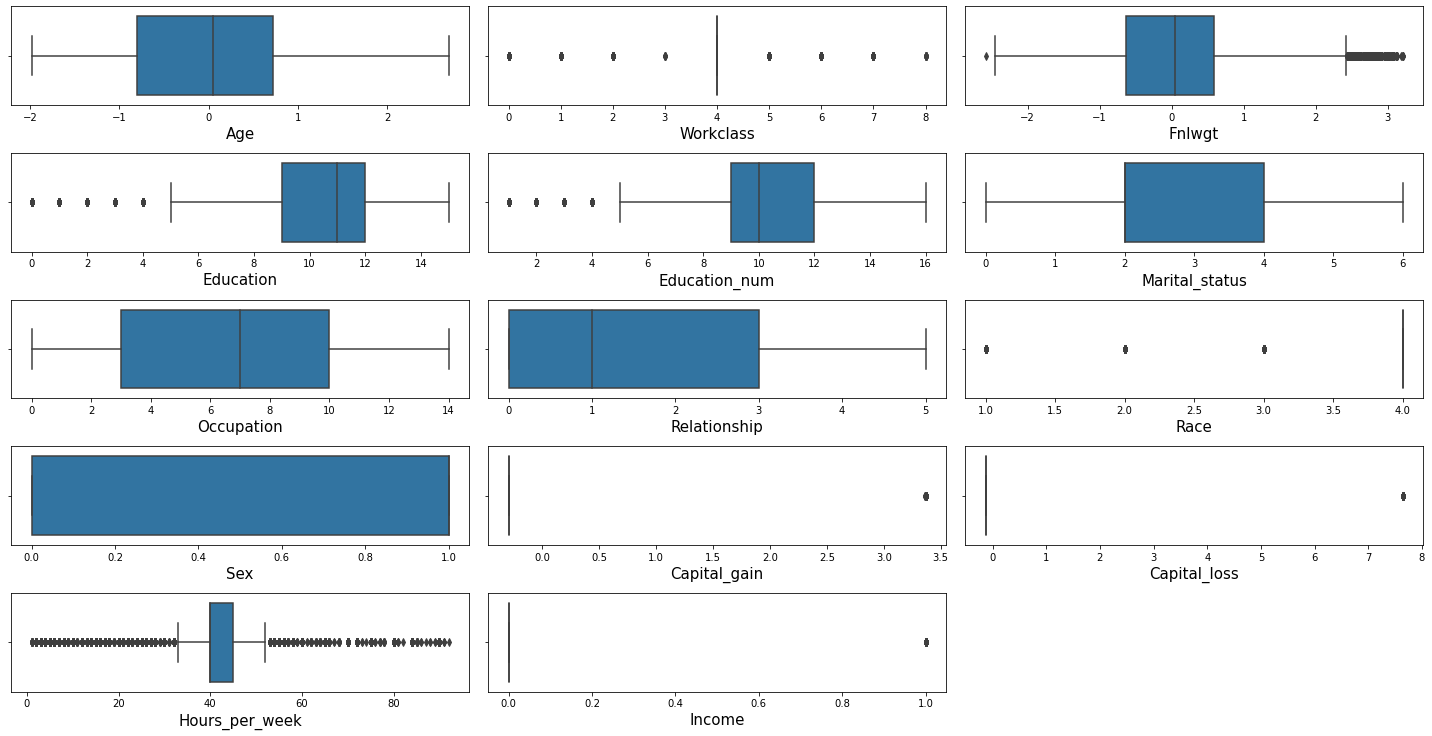

In [39]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for i in census:
    if plotnumber<=30:
        ax=plt.subplot(10,3,plotnumber)
        sns.boxplot(census[i])
        plt.xlabel(i,fontsize=15)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [40]:
census.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Income
0,0.904535,6,-1.116689,9,13,2,4,0,4,1,-0.296969,-0.130916,13,0
1,0.121933,4,0.398490,11,9,0,6,1,4,1,-0.296969,-0.130916,40,0
2,1.074861,4,0.570451,1,7,2,6,0,2,1,-0.296969,-0.130916,40,0
3,-0.711043,4,1.399174,9,13,2,10,5,2,0,-0.296969,-0.130916,40,0
4,0.047603,4,0.988480,12,14,2,4,5,4,0,-0.296969,-0.130916,40,0


### splitting data

In [41]:
x=census.drop(['Income'],axis=1)
y=census['Income']

### imorting smote

In [42]:
from imblearn.over_sampling import SMOTE
over=SMOTE()
x,y=over.fit_resample(x,y)
y.value_counts()

0    23974
1    23974
Name: Income, dtype: int64

target column is now balanced

<AxesSubplot:ylabel='Income'>

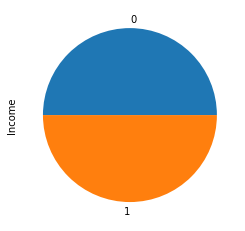

In [43]:
y.value_counts().plot(kind='pie')

### normalization features

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

x_scale=scaler.fit_transform(x)
x=pd.DataFrame(x_scale,columns=x.columns)
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week
0,0.618120,0.750,0.253353,0.600000,0.800000,0.333333,0.285714,0.0,1.000000,1.0,0.000000,0.0,0.131868
1,0.450764,0.500,0.515074,0.733333,0.533333,0.000000,0.428571,0.2,1.000000,1.0,0.000000,0.0,0.428571
2,0.654543,0.500,0.544778,0.066667,0.400000,0.333333,0.428571,0.0,0.333333,1.0,0.000000,0.0,0.428571
3,0.272636,0.500,0.687926,0.600000,0.800000,0.333333,0.714286,1.0,0.333333,0.0,0.000000,0.0,0.428571
4,0.434869,0.500,0.616985,0.800000,0.866667,0.333333,0.285714,1.0,1.000000,0.0,0.000000,0.0,0.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47943,0.481519,0.500,0.350928,0.600000,0.800000,0.333333,0.285714,0.0,1.000000,1.0,0.000000,0.0,0.428571
47944,0.760688,0.500,0.564458,0.866667,0.533333,0.500000,0.071429,0.2,1.000000,0.0,0.467861,0.0,0.164835
47945,0.500458,0.500,0.407899,0.733333,0.533333,0.333333,0.214286,0.0,1.000000,1.0,0.000000,0.0,0.428571
47946,0.888691,0.500,0.436926,0.933333,0.933333,0.333333,0.714286,0.0,1.000000,1.0,0.000000,0.0,0.373626


### importing model 

In [45]:
from sklearn.naive_bayes import  GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve,plot_roc_curve
from sklearn.model_selection import train_test_split, cross_val_score

###### finding best random state 

In [46]:
maxx=0
model=LogisticRegression()
for i in range(1,201):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    accu=accuracy_score(y_test,pred)
    if accu>maxx:
        maxx=accu
        random_state_=i
print('\nmax random state:',random_state_)


max random state: 75


### train test split

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=random_state_)

######  prediction with cross validation

In [48]:
# LogisticRegression model  
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
scr_=cross_val_score(lr,x,y,cv=10)
print('--------------------------LogisticRegression------------------')
print(f'\naccuracy score:{accuracy_score(y_test,pred)*100:.2f}%\n')
print(f'cross validation score:{scr_.mean()*100:.2f}%\n')
print(f'auc roc score:{roc_auc_score(y_test,pred)*100:.2f}%\n')
print(f'\nclassification report:\n\n{classification_report(y_test,pred)}\n')
print(f'confusioon matrix:\n\n{confusion_matrix(y_test,pred)}')

--------------------------LogisticRegression------------------

accuracy score:77.24%

cross validation score:76.42%

auc roc score:77.24%


classification report:

              precision    recall  f1-score   support

           0       0.78      0.75      0.77      5993
           1       0.76      0.79      0.78      5994

    accuracy                           0.77     11987
   macro avg       0.77      0.77      0.77     11987
weighted avg       0.77      0.77      0.77     11987


confusioon matrix:

[[4519 1474]
 [1254 4740]]


In [49]:
# decisiontree classifier model  
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
scr_=cross_val_score(dtc,x,y,cv=10)
print('--------------------------Decision Tree Classifier------------------')
print(f'\naccuracy score:{accuracy_score(y_test,pred)*100:.2f}%\n')
print(f'cross validation score:{scr_.mean()*100:.2f}%\n')
print(f'auc roc score:{roc_auc_score(y_test,pred)*100:.2f}%\n')
print(f'\nclassification report:\n\n{classification_report(y_test,pred)}\n')
print(f'confusioon matrix:\n\n{confusion_matrix(y_test,pred)}')

--------------------------Decision Tree Classifier------------------

accuracy score:84.06%

cross validation score:84.31%

auc roc score:84.06%


classification report:

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      5993
           1       0.84      0.84      0.84      5994

    accuracy                           0.84     11987
   macro avg       0.84      0.84      0.84     11987
weighted avg       0.84      0.84      0.84     11987


confusioon matrix:

[[5036  957]
 [ 954 5040]]


In [50]:
# KNeighbors Classifier model
knc=KNeighborsClassifier()
knc.fit(x_train,y_train)
pred=knc.predict(x_test)
scr_=cross_val_score(knc,x,y,cv=10)
print('--------------------------KNeighbors Classifier------------------')
print(f'\naccuracy score:{accuracy_score(y_test,pred)*100:.2f}%\n')
print(f'cross validation score:{scr_.mean()*100:.2f}%\n')
print(f'auc roc score:{roc_auc_score(y_test,pred)*100:.2f}%\n')
print(f'\nclassification report:\n\n{classification_report(y_test,pred)}\n')
print(f'confusioon matrix:\n\n{confusion_matrix(y_test,pred)}')

--------------------------KNeighbors Classifier------------------

accuracy score:84.96%

cross validation score:85.41%

auc roc score:84.96%


classification report:

              precision    recall  f1-score   support

           0       0.89      0.79      0.84      5993
           1       0.81      0.91      0.86      5994

    accuracy                           0.85     11987
   macro avg       0.85      0.85      0.85     11987
weighted avg       0.85      0.85      0.85     11987


confusioon matrix:

[[4758 1235]
 [ 568 5426]]


In [51]:
# Support Vector Classifier model
svc=SVC()
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
scr_=cross_val_score(svc,x,y,cv=10)
print('--------------------------Support Vector Classifier------------------')
print(f'\naccuracy score:{accuracy_score(y_test,pred)*100:.2f}%\n')
print(f'cross validation score:{scr_.mean()*100:.2f}%\n')
print(f'auc roc score:{roc_auc_score(y_test,pred)*100:.2f}%\n')
print(f'\nclassification report:\n\n{classification_report(y_test,pred)}\n')
print(f'confusioon matrix:\n\n{confusion_matrix(y_test,pred)}')

--------------------------Support Vector Classifier------------------

accuracy score:81.74%

cross validation score:82.27%

auc roc score:81.74%


classification report:

              precision    recall  f1-score   support

           0       0.85      0.77      0.81      5993
           1       0.79      0.87      0.83      5994

    accuracy                           0.82     11987
   macro avg       0.82      0.82      0.82     11987
weighted avg       0.82      0.82      0.82     11987


confusioon matrix:

[[4588 1405]
 [ 784 5210]]


In [52]:
# GaussianNB Classifier model
gnb=GaussianNB()
gnb.fit(x_train,y_train)
pred=gnb.predict(x_test)
scr_=cross_val_score(gnb,x,y,cv=10)
print('--------------------------AdaBoost Classifier------------------')
print(f'\naccuracy score:{accuracy_score(y_test,pred)*100:.2f}%\n')
print(f'cross validation score:{scr_.mean()*100:.2f}%\n')
print(f'auc roc score:{roc_auc_score(y_test,pred)*100:.2f}%\n')
print(f'\nclassification report:\n\n{classification_report(y_test,pred)}\n')
print(f'confusioon matrix:\n\n{confusion_matrix(y_test,pred)}')

--------------------------AdaBoost Classifier------------------

accuracy score:77.93%

cross validation score:78.24%

auc roc score:77.93%


classification report:

              precision    recall  f1-score   support

           0       0.79      0.76      0.77      5993
           1       0.77      0.80      0.78      5994

    accuracy                           0.78     11987
   macro avg       0.78      0.78      0.78     11987
weighted avg       0.78      0.78      0.78     11987


confusioon matrix:

[[4535 1458]
 [1188 4806]]


In [53]:
# RandomForest Classifier model
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)
scr_=cross_val_score(rfc,x,y,cv=10)
print('--------------------------RandomForest Classifier------------------')
print(f'\naccuracy score:{accuracy_score(y_test,pred)*100:.2f}%\n')
print(f'cross validation score:{scr_.mean()*100:.2f}%\n')
print(f'auc roc score:{roc_auc_score(y_test,pred)*100:.2f}%\n')
print(f'\nclassification report:\n\n{classification_report(y_test,pred)}\n')
print(f'confusioon matrix:\n\n{confusion_matrix(y_test,pred)}')

--------------------------RandomForest Classifier------------------

accuracy score:88.84%

cross validation score:89.24%

auc roc score:88.84%


classification report:

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      5993
           1       0.87      0.91      0.89      5994

    accuracy                           0.89     11987
   macro avg       0.89      0.89      0.89     11987
weighted avg       0.89      0.89      0.89     11987


confusioon matrix:

[[5197  796]
 [ 542 5452]]


In [54]:
# AdaBoost Classifier model
abc=AdaBoostClassifier()
abc.fit(x_train,y_train)
pred=abc.predict(x_test)
scr_=cross_val_score(abc,x,y,cv=10)
print('--------------------------AdaBoost Classifier------------------')
print(f'\naccuracy score:{accuracy_score(y_test,pred)*100:.2f}%\n')
print(f'cross validation score:{scr_.mean()*100:.2f}%\n')
print(f'auc roc score:{roc_auc_score(y_test,pred)*100:.2f}%\n')
print(f'\nclassification report:\n\n{classification_report(y_test,pred)}\n')
print(f'confusioon matrix:\n\n{confusion_matrix(y_test,pred)}')

--------------------------AdaBoost Classifier------------------

accuracy score:83.55%

cross validation score:83.63%

auc roc score:83.55%


classification report:

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      5993
           1       0.82      0.86      0.84      5994

    accuracy                           0.84     11987
   macro avg       0.84      0.84      0.84     11987
weighted avg       0.84      0.84      0.84     11987


confusioon matrix:

[[4862 1131]
 [ 841 5153]]


In [55]:
# XGB Classifier model
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
pred=xgb.predict(x_test)
scr_=cross_val_score(xgb,x,y,cv=10)
print('--------------------------AdaBoost Classifier------------------')
print(f'\naccuracy score:{accuracy_score(y_test,pred)*100:.2f}%\n')
print(f'cross validation score:{scr_.mean()*100:.2f}%\n')
print(f'auc roc score:{roc_auc_score(y_test,pred)*100:.2f}%\n')
print(f'\nclassification report:\n\n{classification_report(y_test,pred)}\n')
print(f'confusioon matrix:\n\n{confusion_matrix(y_test,pred)}')

--------------------------AdaBoost Classifier------------------

accuracy score:90.26%

cross validation score:89.65%

auc roc score:90.26%


classification report:

              precision    recall  f1-score   support

           0       0.90      0.91      0.90      5993
           1       0.91      0.90      0.90      5994

    accuracy                           0.90     11987
   macro avg       0.90      0.90      0.90     11987
weighted avg       0.90      0.90      0.90     11987


confusioon matrix:

[[5427  566]
 [ 602 5392]]


In [56]:
# GradientBoosting Classifier model
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
pred=gbc.predict(x_test)
scr_=cross_val_score(gbc,x,y,cv=10)
print('--------------------------AdaBoost Classifier------------------')
print(f'\naccuracy score:{accuracy_score(y_test,pred)*100:.2f}%\n')
print(f'cross validation score:{scr_.mean()*100:.2f}%\n')
print(f'auc roc score:{roc_auc_score(y_test,pred)*100:.2f}%\n')
print(f'\nclassification report:\n\n{classification_report(y_test,pred)}\n')
print(f'confusioon matrix:\n\n{confusion_matrix(y_test,pred)}')

--------------------------AdaBoost Classifier------------------

accuracy score:85.01%

cross validation score:85.17%

auc roc score:85.01%


classification report:

              precision    recall  f1-score   support

           0       0.87      0.82      0.85      5993
           1       0.83      0.88      0.85      5994

    accuracy                           0.85     11987
   macro avg       0.85      0.85      0.85     11987
weighted avg       0.85      0.85      0.85     11987


confusioon matrix:

[[4935 1058]
 [ 739 5255]]


### plotting auc roc curve 

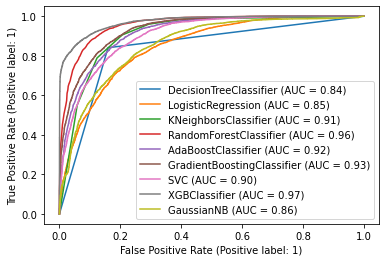

In [57]:
disp=plot_roc_curve(dtc,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_) # ax_ = axes with confusion matrix , use to combine one model to others
plot_roc_curve(knc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rfc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(abc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gbc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(xgb,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gnb,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show()

shows XGBClassifier is giving highest auc value 

## HyperParameter Tuning

###### on the basis of best least difference best model is  KNeighborClassifier

In [59]:
from sklearn.model_selection import GridSearchCV

parameters={ 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
clf=GridSearchCV(knc,parameters)
clf.fit(x_train,y_train)
print('best parameters',clf.best_params_)

knc_new=clf.best_estimator_
knc_new.fit(x_train,y_train)
pred=knc_new.predict(x_test)
scr_=cross_val_score(knc_new,x,y,cv=10)
print('-------------------------- KNeighbors Classifier------------------')
print(f'\naccuracy score:{accuracy_score(y_test,pred)*100:.2f}%\n')
print(f'cross validation score:{scr_.mean()*100:.2f}%\n')
print(f'auc roc score:{roc_auc_score(y_test,pred)*100:.2f}%\n')
print(f'\nclassification report:\n\n{classification_report(y_test,pred)}\n')
print(f'confusioon matrix:\n\n{confusion_matrix(y_test,pred)}')

best parameters {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
-------------------------- KNeighbors Classifier------------------

accuracy score:86.77%

cross validation score:86.85%

auc roc score:86.77%


classification report:

              precision    recall  f1-score   support

           0       0.92      0.81      0.86      5993
           1       0.83      0.93      0.87      5994

    accuracy                           0.87     11987
   macro avg       0.87      0.87      0.87     11987
weighted avg       0.87      0.87      0.87     11987


confusioon matrix:

[[4850 1143]
 [ 443 5551]]


### plotting best model and model

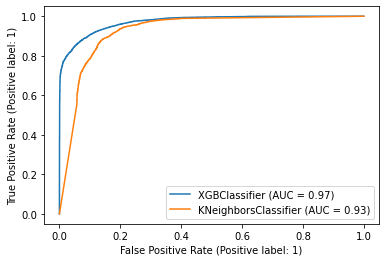

In [60]:
disp=plot_roc_curve(xgb,x_test,y_test)
plot_roc_curve(knc_new,x_test,y_test,ax=disp.ax_) # ax_ = axes with confusion matrix , use to combine one model to others
plt.legend(prop={'size':10},loc='lower right')
plt.show()

### plotting for best model after hyperparameter tuning

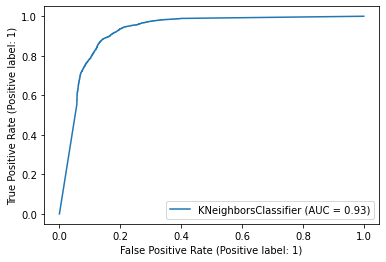

In [61]:
disp=plot_roc_curve(knc_new,x_test,y_test)
plt.legend(prop={'size':10},loc='lower right')
plt.show()

# saving model

In [62]:
import pickle
filename='census_income_predict.pkl'
pickle.dump(knc_new,open(filename,'wb'))